---
# **Financial Data Structures**

---

# Preliminaries

## Libraries

In [3]:
# Imports libraries

# Import functions from RiskLabAI
from RiskLabAI.controller import Controller
from RiskLabAI.data.structures.data_structures_lopez import *
from RiskLabAI.utils import *

from RiskLabAI.data.structures.imbalance_bars import ExpectedImbalanceBars, FixedImbalanceBars
from RiskLabAI.data.structures.run_bars import ExpectedRunBars, FixedRunBars
from RiskLabAI.data.structures.standard_bars import StandardBars
from RiskLabAI.data.structures.time_bars import TimeBars

from RiskLabAI.utils.constants import CUMULATIVE_DOLLAR, CUMULATIVE_VOLUME, CUMULATIVE_TICKS

from RiskLabAI.controller import Controller



import plotly.graph_objects as go
from openpyxl import load_workbook
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


# Set plotting backend and handle numpy errors
pd.options.plotting.backend = "plotly"
np.seterr(divide='ignore', invalid='ignore')


import datetime
import time
import sys
from statsmodels.stats import stattools
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# !pip3 install dtale
import dtale

# Path to save the Excel file
excel_file_path = "structure.xlsx"

# Initialize the Excel file
wb = load_workbook(excel_file_path) if os.path.exists(excel_file_path) else None

/Users/amirshokat/anaconda3/lib/python3.11/site-packages/RiskLabAI/utils/ewma.py:6: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit((float64[:], int64), nopython=False, nogil=True)


# Financial Data Structures Using RiskLabAI


## Data Import and Initial Processing

In [4]:
controller = Controller()
data = pd.read_csv('ahrom_edited.csv')
data["date"] = pd.to_datetime(data["date"])
data

,date,price,volume
0,2022-06-01 09:05:25,13170.0,5000.0
1,2022-06-01 09:06:38,13170.0,500.0
2,2022-06-01 09:06:38,13180.0,5000.0
3,2022-06-01 09:06:38,13190.0,4500.0
4,2022-06-01 09:08:09,13180.0,440.0
...,...,...,...
729721,2023-03-29 12:29:58,22720.0,24.0
729722,2023-03-29 12:29:58,22720.0,21981.0
729723,2023-03-29 12:29:58,22720.0,1000.0
729724,2023-03-29 12:29:58,22720.0,100.0


## Bars

### Standard Bars

#### Time Bars

In [5]:
time = controller.handle_input_command(
    method_name="time_bars",
    method_arguments={
        "resolution_type":'MIN',
        "resolution_units":10,
    },
    input_data=data,
    batch_size=1_000_000,
)

time.head()

Processing batch 0 with size 729726


,Date Time,Tick Number,Open,High,Low,Close,Cumulative Volume,Cumulative Buy Volume,Cumulative Sell Volume,Cumulative Ticks,Cumulative Dollar Value,Threshold
0,2022-06-01 09:13:00,8,13170.0,13190.0,13060.0,13180.0,27744.0,9500.0,18244.0,8,3.651488e+08,1654075200
1,2022-06-01 09:22:31,41,13060.0,13100.0,12980.0,12980.0,259989.0,46144.0,213845.0,33,3.382478e+09,1654075800
2,2022-06-01 09:33:09,56,12960.0,12970.0,12900.0,12900.0,51512.0,774.0,50738.0,15,6.669495e+08,1654076400
3,2022-06-01 09:41:25,94,12910.0,12980.0,12850.0,12860.0,186055.0,67155.0,118900.0,38,2.395223e+09,1654077000
4,2022-06-01 09:50:45,102,12900.0,12950.0,12890.0,12890.0,59899.0,3400.0,56499.0,8,7.723361e+08,1654077600


#### Tick Bars

In [6]:
tick = controller.handle_input_command(
    method_name="tick_standard_bars",
    method_arguments={
        "threshold": 250,
    },
    input_data=data,
    batch_size=1_000_000,
)

tick.head()

Processing batch 0 with size 729726


,Date Time,Tick Number,Open,High,Low,Close,Cumulative Volume,Cumulative Buy Volume,Cumulative Sell Volume,Cumulative Ticks,Cumulative Dollar Value,Threshold
0,2022-06-01 11:01:24,250,13170.0,13390.0,12850.0,13080.0,3095015.0,1484884.0,1610131.0,250,4.046628e+10,250
1,2022-06-06 09:09:27,500,13080.0,13200.0,12870.0,12880.0,3278822.0,1642446.0,1636376.0,250,4.286670e+10,250
2,2022-06-06 10:04:43,750,12880.0,12890.0,12220.0,12470.0,3120580.0,637175.0,2483405.0,250,3.957106e+10,250
3,2022-06-06 11:43:39,1000,12490.0,12580.0,12260.0,12380.0,2325754.0,1072127.0,1253627.0,250,2.881367e+10,250
4,2022-06-07 09:32:17,1250,12380.0,12770.0,12300.0,12530.0,2358989.0,1341340.0,1017649.0,250,2.933229e+10,250


#### Volume Bars

In [7]:
volume = controller.handle_input_command(
    method_name="volume_standard_bars",
    method_arguments={
        "threshold": 3_500_000,
    },
    input_data=data,
    batch_size=1_000_000
)

volume.head()

Processing batch 0 with size 729726


,Date Time,Tick Number,Open,High,Low,Close,Cumulative Volume,Cumulative Buy Volume,Cumulative Sell Volume,Cumulative Ticks,Cumulative Dollar Value,Threshold
0,2022-06-01 11:29:18,290,13170.0,13390.0,12850.0,13100.0,3521932.0,1795147.0,1726785.0,290,4.605738e+10,3500000
1,2022-06-06 09:15:54,538,13130.0,13200.0,12800.0,12800.0,3556348.0,1459490.0,2096858.0,248,4.630839e+10,3500000
2,2022-06-06 10:57:27,902,12800.0,12890.0,12220.0,12270.0,3516317.0,813844.0,2702473.0,364,4.412750e+10,3500000
3,2022-06-07 09:29:28,1241,12260.0,12770.0,12260.0,12510.0,3512073.0,2037001.0,1475072.0,339,4.364896e+10,3500000
4,2022-06-07 10:41:14,1441,12520.0,12700.0,12480.0,12500.0,3556973.0,1627044.0,1929929.0,200,4.493069e+10,3500000


#### Dollar Bars

In [8]:
dollar = controller.handle_input_command(
    method_name="dollar_standard_bars",
    method_arguments={
        "threshold": 60_000_000_000,
    },
    input_data=data,
    batch_size=1_000_000,
)

dollar.head()

Processing batch 0 with size 729726


,Date Time,Tick Number,Open,High,Low,Close,Cumulative Volume,Cumulative Buy Volume,Cumulative Sell Volume,Cumulative Ticks,Cumulative Dollar Value,Threshold
0,2022-06-01 11:53:13,361,13170.0,13390.0,12850.0,13100.0,4602162.0,2129547.0,2472615.0,361,6.018782e+10,60000000000
1,2022-06-06 09:54:16,724,13100.0,13200.0,12220.0,12460.0,4678312.0,1589824.0,3088488.0,363,6.004993e+10,60000000000
2,2022-06-07 09:29:29,1242,12460.0,12770.0,12260.0,12520.0,4836196.0,2396111.0,2440085.0,518,6.002969e+10,60000000000
3,2022-06-07 12:00:43,1599,12520.0,12700.0,12300.0,12350.0,4784633.0,1983871.0,2800762.0,357,6.015340e+10,60000000000
4,2022-06-08 10:15:23,1911,12330.0,12750.0,12300.0,12600.0,4785471.0,1512559.0,3272912.0,312,6.014171e+10,60000000000


#### Stability

In [9]:
time = time.set_index(['Date Time'])
dollar = dollar.set_index(['Date Time'])
volume = volume.set_index(['Date Time'])
tick = tick.set_index(['Date Time'])

In [10]:
dollar_count = dollar['Close'].resample('M').count()
volume_count = volume['Close'].resample('M').count()
tick_count = tick['Close'].resample('M').count()
time_count = time['Open'].resample('M').count()

count_df = pd.concat([time_count, tick_count, volume_count, dollar_count], axis=1)
count_df.columns = ['time', 'tick', 'volume', 'dollar']
count_df

,time,tick,volume,dollar
Date Time,,,,
2022-06-30,397,59,62,46
2022-07-31,409,48,34,22
2022-08-31,443,72,74,47
2022-09-30,351,47,36,21
2022-10-31,460,60,51,27
2022-11-30,462,230,259,155
2022-12-31,422,399,503,348
2023-01-31,465,726,787,625
2023-02-28,356,431,526,483


In [11]:
# Create and style traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=count_df.index, y=count_df['time'], name='Time'))
fig.add_trace(go.Scatter(x=count_df.index, y=count_df['tick'], name='Tick'))
fig.add_trace(go.Scatter(x=count_df.index, y=count_df['volume'], name='Volume'))
fig.add_trace(go.Scatter(x=count_df.index, y=count_df['dollar'], name='Dollar'))

# Use the function to update layout
update_figure_layout(
    fig,
    title="Standard Bars Frequency",
    xaxis_title="Date",
    yaxis_title="Frequency"
)

# Save count_df data to Excel without overwriting previous sheets
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
    count_df.to_excel(writer, sheet_name='Standard Bars Frequency RiskLabAI')

# Show the plot
fig.show()

#### Normality

##### Jarque-Bera Test

In [12]:
dollar_returns = np.log(dollar['Close']).diff().dropna()
volume_returns = np.log(volume['Close']).diff().dropna()
tick_returns = np.log(tick['Close']).diff().dropna()
time_returns = np.log(time['Open']).diff().dropna()

In [13]:
print("Jarque-Bera test statistic for time returns:", int(stats.jarque_bera(time_returns)[0]))
print("Jarque-Bera test statistic for dollar returns:", int(stats.jarque_bera(dollar_returns)[0]))
print("Jarque-Bera test statistic for volume returns:", int(stats.jarque_bera(volume_returns)[0]))
print("Jarque-Bera test statistic for tick returns:", int(stats.jarque_bera(tick_returns)[0]))

Jarque-Bera test statistic for time returns: 102937
Jarque-Bera test statistic for dollar returns: 22870
Jarque-Bera test statistic for volume returns: 32583
Jarque-Bera test statistic for tick returns: 25589


##### Shapiro-Wilk Test

In [14]:
print("Shapiro-Wilk test statistic for time returns:", stats.shapiro(time_returns))
print("Shapiro-Wilk test statistic for dollar returns:", stats.shapiro(dollar_returns))
print("Shapiro-Wilk test statistic for volume returns:", stats.shapiro(volume_returns))
print("Shapiro-Wilk test statistic for tick returns:", stats.shapiro(tick_returns))

Shapiro-Wilk test statistic for time returns: ShapiroResult(statistic=0.8194491267204285, pvalue=0.0)
Shapiro-Wilk test statistic for dollar returns: ShapiroResult(statistic=0.8644465804100037, pvalue=1.821688003622262e-43)
Shapiro-Wilk test statistic for volume returns: ShapiroResult(statistic=0.8705788850784302, pvalue=2.802596928649634e-45)
Shapiro-Wilk test statistic for tick returns: ShapiroResult(statistic=0.8880372047424316, pvalue=9.45736333572819e-42)


##### Results KDE plot 

###### Standardize Data

In [23]:
time_standard = (time_returns - time_returns.mean()) / time_returns.std()
tick_standard = (tick_returns - tick_returns.mean()) / tick_returns.std()
volume_standard = (volume_returns - volume_returns.mean()) / volume_returns.std()
dollar_standard = (dollar_returns - dollar_returns.mean()) / dollar_returns.std()

###### Distribution Plot

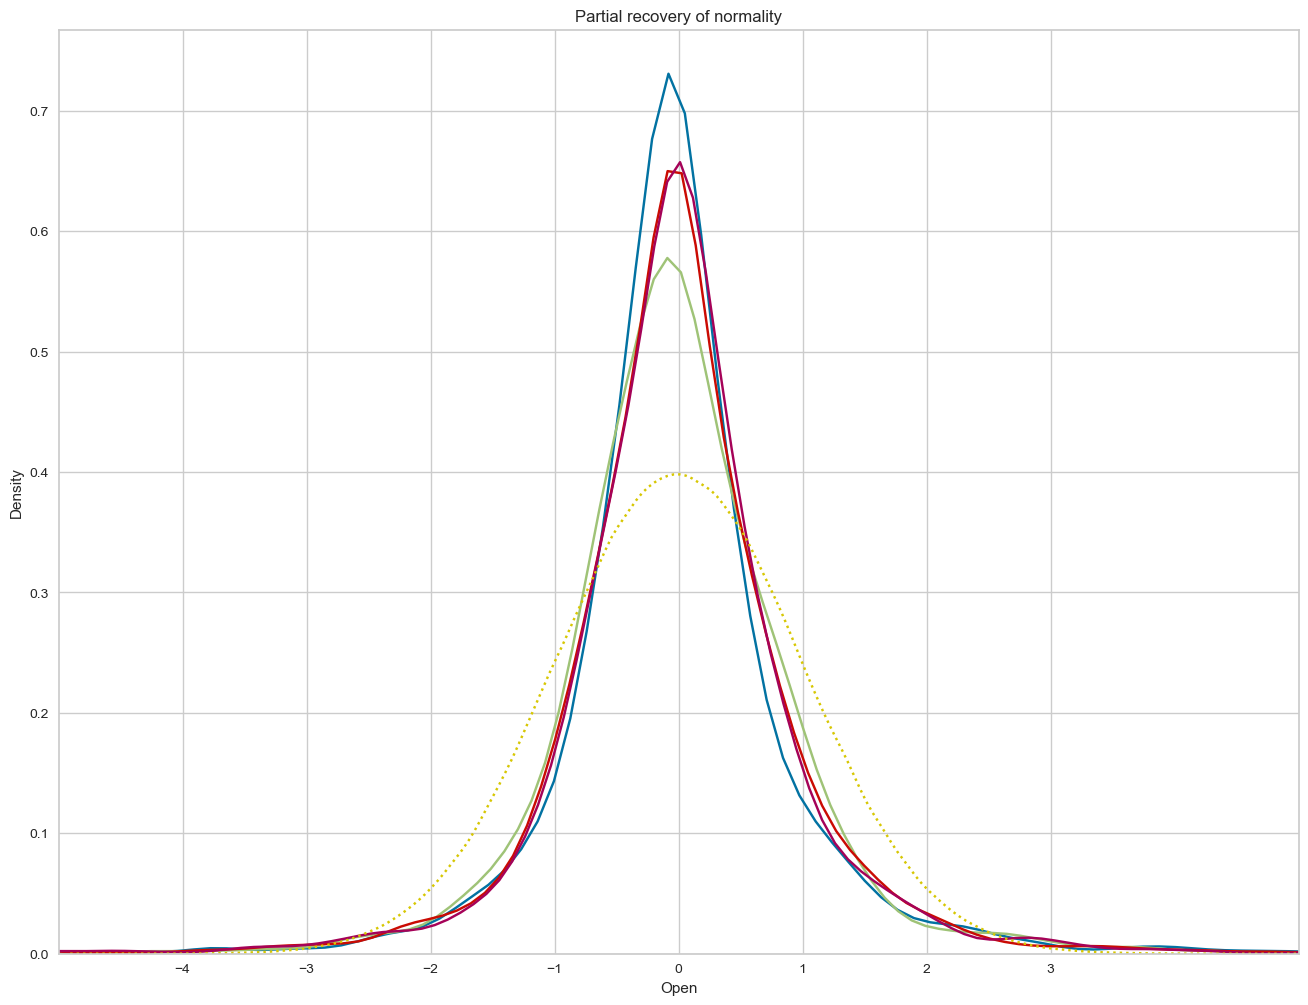

In [24]:
plt.figure(figsize=(16, 12))
sns.kdeplot(time_standard, label="Time")
sns.kdeplot(tick_standard, label="Tick")
sns.kdeplot(volume_standard, label="Volume")
sns.kdeplot(dollar_standard, label="Dollar")
sns.kdeplot(np.random.normal(size=1000000), label="Normal", linestyle="dotted")
plt.xticks(range(-4, +4))
plt.title(
    'Partial recovery of normality',
    loc='center', 
)
plt.xlim(-5, 5)
plt.show()

# Save the standardized returns data to Excel without overwriting previous sheets
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
    time_standard.to_excel(writer, sheet_name='Standardized Returns', startcol=0, index=True)
    tick_standard.to_excel(writer, sheet_name='Standardized Returns', startcol=2, index=True)
    volume_standard.to_excel(writer, sheet_name='Standardized Returns', startcol=4, index=True)
    dollar_standard.to_excel(writer, sheet_name='Standardized Returns', startcol=6, index=True)

### Information Driven Bars

#### Expected Imbalance Bars

##### Imbalance Tick Bars

In [25]:
expected_tick_imbalance_bars = controller.handle_input_command(
    method_name="expected_tick_imbalance_bars",
    method_arguments={
        "window_size_for_expected_n_ticks_estimation": 5,
        "window_size_for_expected_imbalance_estimation": 10000,
        "initial_estimate_of_expected_n_ticks_in_bar": 2000,
    },
    input_data=data,
    batch_size=1_000_000,
)

expected_tick_imbalance_bars.head()

Processing batch 0 with size 729726


,Date Time,Tick Number,Open,High,Low,Close,Cumulative Volume,Cumulative Buy Volume,Cumulative Sell Volume,Cumulative Ticks,Cumulative Dollar Value,Threshold
0,2022-06-08 11:23:43,2044,13170.0,13390.0,12220.0,12470.0,26548415.0,10605427.0,15942988.0,2044,3.364905e+11,447.406074
1,2022-06-12 10:17:10,3624,12470.0,12630.0,12020.0,12350.0,30067863.0,8270822.0,21797041.0,1580,3.680601e+11,471.338397
2,2022-06-13 09:59:35,5847,12350.0,13450.0,12350.0,13350.0,52167269.0,13644158.0,38523111.0,2223,6.794439e+11,480.912771
3,2022-06-15 09:40:51,8100,13350.0,13440.0,12910.0,12940.0,38768187.0,13183109.0,25585078.0,2253,5.130917e+11,490.143140
4,2022-06-20 11:33:17,10160,12940.0,13100.0,12620.0,12860.0,28605620.0,7721757.0,20883863.0,2060,3.690207e+11,509.870699


##### Imbalance Volume Bars

In [26]:
expected_volume_imbalance_bars = controller.handle_input_command(
    method_name="expected_volume_imbalance_bars",
    method_arguments={
        "window_size_for_expected_n_ticks_estimation": 5,
        "window_size_for_expected_imbalance_estimation": 10000,
        "initial_estimate_of_expected_n_ticks_in_bar": 2000,
    },
    input_data=data,
    batch_size=1_000_000,
)

expected_volume_imbalance_bars.head()

Processing batch 0 with size 729726


,Date Time,Tick Number,Open,High,Low,Close,Cumulative Volume,Cumulative Buy Volume,Cumulative Sell Volume,Cumulative Ticks,Cumulative Dollar Value,Threshold
0,2022-06-11 10:12:56,2439,13170.0,13390.0,12210.0,12210.0,31594381.0,12250162.0,19344219.0,2439,3.988526e+11,7.081032e+06
1,2022-06-12 09:18:20,3235,12210.0,12400.0,12020.0,12100.0,17413605.0,3892529.0,13521076.0,796,2.124028e+11,9.590217e+06
2,2022-06-12 11:30:20,4210,12100.0,12770.0,12100.0,12600.0,22498753.0,5969868.0,16528885.0,975,2.801150e+11,1.051831e+07
3,2022-06-13 09:51:48,5625,12600.0,13450.0,12600.0,13350.0,28913342.0,9013779.0,19899563.0,1415,3.808178e+11,1.084702e+07
4,2022-06-14 10:43:20,7343,13350.0,13450.0,13190.0,13330.0,31253189.0,10276538.0,20976651.0,1718,4.167335e+11,1.069120e+07


##### Imbalance Dollar Bars

In [27]:
expected_dollar_imbalance_bars = controller.handle_input_command(
    method_name="expected_dollar_imbalance_bars",
    method_arguments={
        "window_size_for_expected_n_ticks_estimation": 5,
        "window_size_for_expected_imbalance_estimation": 10000,
        "initial_estimate_of_expected_n_ticks_in_bar": 2000,
    },
    input_data=data,
    batch_size=1_000_000,
)

expected_dollar_imbalance_bars.head()

Processing batch 0 with size 729726


,Date Time,Tick Number,Open,High,Low,Close,Cumulative Volume,Cumulative Buy Volume,Cumulative Sell Volume,Cumulative Ticks,Cumulative Dollar Value,Threshold
0,2022-06-11 10:12:57,2441,13170.0,13390.0,12210.0,12210.0,31694381.0,12250162.0,19444219.0,2441,4.000736e+11,8.854034e+10
1,2022-06-12 09:18:21,3245,12210.0,12400.0,12020.0,12100.0,17813605.0,3892529.0,13921076.0,804,2.172318e+11,1.214232e+11
2,2022-06-12 11:41:46,4257,12100.0,12770.0,12100.0,12650.0,22847356.0,6031553.0,16815803.0,1012,2.847886e+11,1.342316e+11
3,2022-06-13 09:51:49,5635,12650.0,13450.0,12640.0,13350.0,28564739.0,8952094.0,19612645.0,1378,3.767692e+11,1.387601e+11
4,2022-06-14 10:49:06,7383,13350.0,13450.0,13190.0,13270.0,31107988.0,10359935.0,20748053.0,1748,4.147733e+11,1.382359e+11


#### Fixed Imbalance Bars

##### Fixed Imbalance Tick Bars

In [28]:
fixed_tick_imbalance_bars = controller.handle_input_command(
    method_name="fixed_tick_imbalance_bars",
    method_arguments={
        "window_size_for_expected_imbalance_estimation": 10000,
        "initial_estimate_of_expected_n_ticks_in_bar": 20000,
    },
    input_data=data,
    batch_size=1_000_000,
)

fixed_tick_imbalance_bars.head()

Processing batch 0 with size 729726


,Date Time,Tick Number,Open,High,Low,Close,Cumulative Volume,Cumulative Buy Volume,Cumulative Sell Volume,Cumulative Ticks,Cumulative Dollar Value,Threshold
0,2022-07-16 12:29:50,20000,13170.0,13450.0,10880.0,11150.0,262457548.0,87058535.0,175399013.0,20000,3.295302e+12,2889.509958
1,2022-08-21 10:44:22,38008,11150.0,11900.0,10150.0,10540.0,242083579.0,102948097.0,139135482.0,18008,2.640342e+12,2889.509958
2,2022-09-24 10:51:00,54118,10530.0,11320.0,9310.0,9390.0,184497156.0,68433080.0,116064076.0,16110,1.948941e+12,3459.754142
3,2022-11-15 12:00:44,107793,9390.0,11100.0,7710.0,10400.0,843263959.0,367021932.0,476242027.0,53675,8.288547e+12,6580.895134
4,2022-11-29 11:04:49,127177,10400.0,10920.0,10040.0,10500.0,259926884.0,110795452.0,149131432.0,19384,2.737274e+12,2915.692524


##### Fixed Imabalance Volume Bars

In [29]:
fixed_volume_imbalance_bars = controller.handle_input_command(
    method_name="fixed_volume_imbalance_bars",
    method_arguments={
        "window_size_for_expected_imbalance_estimation": 10000,
        "initial_estimate_of_expected_n_ticks_in_bar": 20000,
    },
    input_data=data,
    batch_size=1_000_000,
)

fixed_volume_imbalance_bars.head()

Processing batch 0 with size 729726


,Date Time,Tick Number,Open,High,Low,Close,Cumulative Volume,Cumulative Buy Volume,Cumulative Sell Volume,Cumulative Ticks,Cumulative Dollar Value,Threshold
0,2022-07-16 12:29:50,20000,13170.0,13450.0,10880.0,11150.0,262457548.0,87058535.0,175399013.0,20000,3.295302e+12,2.813519e+07
1,2022-08-13 09:08:14,31156,11150.0,11900.0,10150.0,10830.0,146885309.0,59348469.0,87536840.0,11156,1.584831e+12,2.813519e+07
2,2022-09-13 11:41:39,50600,10830.0,11500.0,10020.0,10220.0,252170978.0,102250645.0,149920333.0,19444,2.733024e+12,4.766920e+07
3,2022-10-25 11:24:15,67203,10210.0,10290.0,8330.0,8340.0,194349808.0,67817013.0,126532795.0,16603,1.789494e+12,5.870817e+07
4,2022-11-29 10:30:50,126819,8370.0,11100.0,7710.0,10500.0,926187442.0,417572114.0,508615328.0,59616,9.400803e+12,9.104169e+07


##### Fixed Imbalance Dollar Bars

In [30]:
fixed_dollar_imbalance_bars = controller.handle_input_command(
    method_name="fixed_dollar_imbalance_bars",
    method_arguments={
        "window_size_for_expected_imbalance_estimation": 10000,
        "initial_estimate_of_expected_n_ticks_in_bar": 20000,
    },
    input_data=data,
    batch_size=1_000_000,
)

fixed_dollar_imbalance_bars.head()

Processing batch 0 with size 729726


,Date Time,Tick Number,Open,High,Low,Close,Cumulative Volume,Cumulative Buy Volume,Cumulative Sell Volume,Cumulative Ticks,Cumulative Dollar Value,Threshold
0,2022-07-16 12:29:50,20000,13170.0,13450.0,10880.0,11150.0,262457548.0,87058535.0,175399013.0,20000,3.295302e+12,3.297244e+11
1,2022-08-15 12:17:44,34509,11150.0,11900.0,10150.0,11200.0,199402779.0,84534368.0,114868411.0,14509,2.168207e+12,3.297244e+11
2,2022-09-05 09:45:14,46369,11200.0,11500.0,10410.0,10640.0,157551583.0,62214860.0,95336723.0,11860,1.716740e+12,3.524270e+11
3,2022-10-26 11:27:35,68318,10640.0,10710.0,7800.0,7800.0,245467171.0,84929202.0,160537969.0,21949,2.295750e+12,6.975571e+11
4,2022-11-28 09:46:09,124976,7800.0,11100.0,7710.0,10480.0,889837968.0,405582848.0,484255120.0,56658,9.040856e+12,7.940272e+11


#### Run Bars

##### Expected Run bars

###### Expected Tick Run Bars

In [31]:
expected_tick_run_bars = controller.handle_input_command(
    method_name="expected_tick_run_bars",
    method_arguments={
        "window_size_for_expected_n_ticks_estimation": 5,
        "window_size_for_expected_imbalance_estimation": 10000,
        "initial_estimate_of_expected_n_ticks_in_bar": 20000,
    },
    input_data=data,
    batch_size=1_000_000,
)

expected_tick_run_bars.head()

Processing batch 0 with size 729726


,Date Time,Tick Number,Open,High,Low,Close,Cumulative Volume,Cumulative Buy Volume,Cumulative Sell Volume,Cumulative Ticks,Cumulative Dollar Value,Threshold


###### Expected volume Run Bars

In [32]:
expected_volume_run_bars = controller.handle_input_command(
    method_name="expected_volume_run_bars",
    method_arguments={
        "window_size_for_expected_n_ticks_estimation": 5,
        "window_size_for_expected_imbalance_estimation": 10000,
        "initial_estimate_of_expected_n_ticks_in_bar": 20000,
    },
    input_data=data,
    batch_size=1_000_000,
)

expected_volume_run_bars.head()

Processing batch 0 with size 729726


,Date Time,Tick Number,Open,High,Low,Close,Cumulative Volume,Cumulative Buy Volume,Cumulative Sell Volume,Cumulative Ticks,Cumulative Dollar Value,Threshold
0,2022-09-10 11:59:27,48456,13170.0,13450.0,10080.0,10240.0,637624315.0,239201038.0,398423277.0,48456,7.369559e+12,1.507193e+08
1,2022-11-08 11:53:25,90578,10240.0,10960.0,7710.0,10140.0,640475639.0,275301976.0,365173663.0,42122,6.096771e+12,3.651627e+08
2,2022-12-11 10:36:18,145243,10140.0,11100.0,9480.0,9860.0,787824864.0,311614147.0,476210717.0,54665,8.224527e+12,4.761921e+08
3,2022-12-19 12:29:00,183392,9870.0,11990.0,9850.0,11470.0,750882931.0,333818190.0,417064741.0,38149,8.529380e+12,4.170644e+08
4,2023-01-01 09:32:24,233186,11470.0,14220.0,11340.0,12820.0,852217528.0,396089169.0,456128359.0,49794,1.094231e+13,4.561099e+08


###### Expected Dollar Run Bars

In [33]:
expected_dollar_run_bars = controller.handle_input_command(
    method_name="expected_dollar_run_bars",
    method_arguments={
        "window_size_for_expected_n_ticks_estimation": 5,
        "window_size_for_expected_imbalance_estimation": 10000,
        "initial_estimate_of_expected_n_ticks_in_bar": 20000,
    },
    input_data=data,
    batch_size=1_000_000,
)

expected_dollar_run_bars.head()

Processing batch 0 with size 729726


,Date Time,Tick Number,Open,High,Low,Close,Cumulative Volume,Cumulative Buy Volume,Cumulative Sell Volume,Cumulative Ticks,Cumulative Dollar Value,Threshold
0,2022-09-10 11:59:27,48456,13170.0,13450.0,10080.0,10240.0,637624315.0,239201038.0,398423277.0,48456,7.369559e+12,1.620267e+12
1,2022-11-12 09:07:14,96268,10240.0,11050.0,7710.0,10860.0,728163409.0,318814063.0,409349346.0,47812,7.027529e+12,3.925583e+12
2,2022-12-13 09:04:00,150161,10870.0,11100.0,9480.0,10820.0,781801251.0,312851038.0,468950213.0,53893,8.128427e+12,4.869173e+12
3,2022-12-19 12:13:47,182750,10850.0,11990.0,10770.0,11440.0,655628915.0,282266465.0,373362450.0,32589,7.538427e+12,4.288413e+12
4,2022-12-31 12:25:46,227769,11450.0,14220.0,11340.0,12690.0,773171201.0,366166405.0,407004796.0,45019,9.891696e+12,5.157369e+12


##### Fixed Run Bars

###### Fixed Tick Run Bars

In [34]:
fixed_tick_run_bars = controller.handle_input_command(
    method_name="fixed_tick_run_bars",
    method_arguments={
        "window_size_for_expected_imbalance_estimation": 10000,
        "initial_estimate_of_expected_n_ticks_in_bar": 20000,
    },
    input_data=data,
    batch_size=1_000_000,
)

fixed_tick_run_bars.head()

Processing batch 0 with size 729726


,Date Time,Tick Number,Open,High,Low,Close,Cumulative Volume,Cumulative Buy Volume,Cumulative Sell Volume,Cumulative Ticks,Cumulative Dollar Value,Threshold


###### Fixed Volume Run Bars

In [35]:
fixed_volume_run_bars = controller.handle_input_command(
    method_name="fixed_volume_run_bars",
    method_arguments={
        "window_size_for_expected_imbalance_estimation": 10000,
        "initial_estimate_of_expected_n_ticks_in_bar": 20000,
    },
    input_data=data,
    batch_size=1_000_000,
)

fixed_volume_run_bars.head()

Processing batch 0 with size 729726


,Date Time,Tick Number,Open,High,Low,Close,Cumulative Volume,Cumulative Buy Volume,Cumulative Sell Volume,Cumulative Ticks,Cumulative Dollar Value,Threshold
0,2022-09-10 11:59:27,48456,13170.0,13450.0,10080.0,10240.0,637624315.0,239201038.0,398423277.0,48456,7.369559e+12,1.507193e+08
1,2022-10-26 11:54:47,68548,10240.0,10360.0,7710.0,7800.0,230738256.0,80017395.0,150720861.0,20092,2.133568e+12,1.507193e+08
2,2022-11-07 10:22:54,82853,7820.0,10470.0,7740.0,10380.0,294942240.0,144155467.0,150786773.0,14305,2.752901e+12,1.507839e+08
3,2022-11-19 12:02:59,112348,10380.0,11100.0,10040.0,10120.0,423341888.0,186307127.0,237034761.0,29495,4.487508e+12,2.370094e+08
4,2022-12-03 11:12:55,130073,10160.0,10860.0,10110.0,10500.0,249576484.0,103740832.0,145835652.0,17725,2.630787e+12,1.458287e+08


###### Fixed Dollar Run Bars

In [36]:
fixed_dollar_run_bars = controller.handle_input_command(
    method_name="fixed_dollar_run_bars",
    method_arguments={
        "window_size_for_expected_imbalance_estimation": 10000,
        "initial_estimate_of_expected_n_ticks_in_bar": 20000,
    },
    input_data=data,
    batch_size=1_000_000,
)

fixed_dollar_run_bars.head()

Processing batch 0 with size 729726


,Date Time,Tick Number,Open,High,Low,Close,Cumulative Volume,Cumulative Buy Volume,Cumulative Sell Volume,Cumulative Ticks,Cumulative Dollar Value,Threshold
0,2022-09-10 11:59:27,48456,13170.0,13450.0,10080.0,10240.0,637624315.0,239201038.0,398423277.0,48456,7.369559e+12,1.620267e+12
1,2022-11-01 09:06:34,71748,10240.0,10360.0,7710.0,8640.0,279558678.0,100492848.0,179065830.0,23292,2.536795e+12,1.620267e+12
2,2022-11-08 09:04:08,86052,8640.0,10900.0,8460.0,10800.0,284262931.0,148607559.0,135655372.0,14304,2.750523e+12,1.445148e+12
3,2022-11-15 09:31:03,106286,10800.0,11100.0,10040.0,10750.0,314690227.0,131470147.0,183220080.0,20234,3.344599e+12,1.945589e+12
4,2022-11-30 09:09:03,127832,10730.0,10920.0,10040.0,10570.0,287315167.0,121567302.0,165747865.0,21546,3.027045e+12,1.742793e+12


# Financial Data Structures Using Lopez book

## Data Import and Initial Processing

In [12]:
dir = "https://raw.githubusercontent.com/risk-labratory/data/main/"
url = dir + "IVE_2020.csv"

dataframe = pd.read_csv(url, header=0)
dataframe['dates'] = pd.to_datetime(dataframe['dates'])
dataframe.set_index('dates', inplace=True, drop=True)
dataframe.drop_duplicates(inplace=True)
dataframe = dataframe[(dataframe.index.hour >= 9) & (dataframe.index.hour < 16)]
dataframe.head()


,price,bid,ask,size
dates,,,,
2020-01-02 09:30:00,130.68,130.59,130.60,20625
2020-01-02 09:30:01,130.50,130.50,130.77,200
2020-01-02 09:30:04,130.53,130.52,130.78,100
2020-01-02 09:30:04,130.55,130.52,130.78,100
2020-01-02 09:30:04,130.53,130.52,130.78,200


## Bars

### Standard Bars

#### Time Bars

In [111]:
ohlcvTime = generate_time_bar(dataframe, frequency = "30Min")
ohlcvTime.head(10)

,open,high,low,close,volume,value_of_trades,price_mean,tick_count,price_mean_log_return
dates,,,,,,,,,
2020-01-02 09:30:00,130.6800,130.7800,130.3700,130.4299,164048,130.585010,130.558158,262,NaN
2020-01-02 10:00:00,130.4000,130.4000,130.0218,130.0564,75227,130.141558,130.178844,132,-0.002910
2020-01-02 10:30:00,130.0800,130.2000,129.9713,130.2000,91006,130.079069,130.056870,124,-0.000937
2020-01-02 11:00:00,130.2050,130.2089,130.0800,130.1300,65182,130.141968,130.138222,64,0.000625
2020-01-02 11:30:00,130.0833,130.0833,129.9380,130.0300,84253,130.013381,130.016007,59,-0.000940
2020-01-02 12:00:00,130.0215,130.1179,129.9800,130.0732,59420,130.063977,130.075780,60,0.000460
2020-01-02 12:30:00,130.0945,130.1348,130.0420,130.0773,152349,130.084798,130.073998,125,-0.000014
2020-01-02 13:00:00,130.0700,130.0700,129.9566,129.9566,16861,129.995596,129.990660,45,-0.000641
2020-01-02 13:30:00,129.9799,130.0200,129.9400,129.9779,64199,129.969085,129.969793,81,-0.000161


#### Tick Bars

In [112]:
timeBarLen = ohlcvTime.shape[0]
ohlcvTick = generate_tick_bar(dataframe, ticks_per_bar = 0, number_bars = timeBarLen)
ohlcvTick.head(10)

,open,high,low,close,volume,value_of_trades,price_mean,tick_count,price_mean_log_return
dates,,,,,,,,,
2020-01-02 09:30:00,130.680,130.7800,130.5000,130.7800,23625,130.672466,130.607500,16,NaN
2020-01-02 09:30:05,130.780,130.7800,130.5200,130.6650,8446,130.647502,130.676562,16,0.000529
2020-01-02 09:30:29,130.660,130.7049,130.6000,130.6200,1982,130.649491,130.647181,16,-0.000225
2020-01-02 09:32:12,130.620,130.6200,130.5600,130.5700,5200,130.574894,130.579031,16,-0.000522
2020-01-02 09:32:51,130.570,130.6100,130.5567,130.5900,5721,130.589296,130.586669,16,0.000058
2020-01-02 09:33:04,130.590,130.6300,130.5900,130.6242,52946,130.609491,130.611506,16,0.000190
2020-01-02 09:33:32,130.640,130.6700,130.5350,130.5500,5886,130.589667,130.604900,16,-0.000051
2020-01-02 09:35:05,130.550,130.5900,130.4800,130.5600,3614,130.536972,130.544238,16,-0.000465
2020-01-02 09:35:54,130.570,130.6200,130.5000,130.5000,5021,130.549199,130.551112,16,0.000053


#### Volume Bars

In [6]:
ohlcvVolume = generate_volume_bar(dataframe, volume_per_bar = 0, number_bars = timeBarLen)
ohlcvVolume.head(10)

,open,high,low,close,volume,value_of_trades,price_mean,tick_count,price_mean_log_return
dates,,,,,,,,,
2020-01-02 09:30:00,130.6800,130.6800,130.5000,130.5300,21225,130.675571,130.558000,5,NaN
2020-01-02 09:30:04,130.5400,130.7800,130.5200,130.7800,5913,130.716073,130.664444,18,0.000815
2020-01-02 09:30:12,130.5200,130.7400,130.5200,130.5700,8315,130.587541,130.632637,32,-0.000243
2020-01-02 09:32:50,130.5700,130.5900,130.5567,130.5900,6921,130.575836,130.576668,19,-0.000429
2020-01-02 09:33:04,130.6100,130.6200,130.5900,130.6200,6400,130.599844,130.602667,15,0.000199
2020-01-02 09:33:22,130.6100,130.6700,130.5980,130.6700,50546,130.611426,130.637436,14,0.000266
2020-01-02 09:34:09,130.6295,130.6295,130.5350,130.5400,6286,130.566144,130.564275,16,-0.000560
2020-01-02 09:35:17,130.4978,130.6200,130.4500,130.4900,7975,130.531469,130.528919,32,-0.000271
2020-01-02 09:39:53,130.5100,130.5600,130.5100,130.5300,7089,130.530707,130.530645,31,0.000013


#### Dollar Bars

In [8]:
ohlcvDollar = generate_dollar_bar(dataframe, dollar_per_bar = 0, number_bars = timeBarLen)
ohlcvDollar.head(10)

,open,high,low,close,volume,value_of_trades,price_mean,tick_count,price_mean_log_return
dates,,,,,,,,,
2020-01-02 09:30:00,130.6800,130.78,130.5000,130.67,24225,130.674262,130.631500,20,NaN
2020-01-02 09:30:05,130.6700,130.78,130.5200,130.52,4846,130.669480,130.660000,4,0.000218
2020-01-02 09:30:12,130.5200,130.74,130.5200,130.59,7182,130.604879,130.629840,35,-0.000231
2020-01-02 09:32:50,130.5700,130.59,130.5567,130.59,6121,130.575292,130.575780,15,-0.000414
2020-01-02 09:33:04,130.6100,130.61,130.5900,130.61,6100,130.599180,130.600769,13,0.000191
2020-01-02 09:33:19,130.6100,130.62,130.6100,130.62,300,130.613333,130.615000,2,0.000109
2020-01-02 09:33:22,130.6100,130.63,130.6100,130.63,48100,130.610042,130.620000,2,0.000038
2020-01-02 09:33:23,130.6300,130.67,130.5350,130.55,5832,130.602522,130.611625,20,-0.000064
2020-01-02 09:35:05,130.5500,130.62,130.4800,130.55,5465,130.545136,130.553600,23,-0.000444


#### Stability

In [189]:
countAverage = pd.DataFrame()
countAverage['time'] = ohlcvTime.resample("1W")['tick_count'].mean()
countAverage['tick'] = ohlcvTick.resample("1W")['tick_count'].mean()
countAverage['volume'] = ohlcvVolume.resample("1W")['tick_count'].mean()
countAverage['dollar'] = ohlcvDollar.resample("1W")['tick_count'].mean()
countAverage.head(10)

,time,tick,volume,dollar
dates,,,,
2020-01-05,13.676301,16.0,13.917647,11.889447
2020-01-12,11.848214,16.0,16.518672,14.067138
2020-01-19,12.035714,16.0,19.536232,16.850000
2020-01-26,9.526786,16.0,17.788889,15.247619
2020-02-02,15.601190,16.0,20.552941,17.826531
2020-02-09,11.348214,16.0,17.652778,15.627049
2020-02-16,7.669643,16.0,18.539568,15.907407
2020-02-23,7.125000,16.0,17.873134,15.653595
2020-03-01,45.872024,16.0,23.860681,22.469388


In [192]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=countAverage.index, y=countAverage.time, name='Time'))
fig.add_trace(go.Scatter(x=countAverage.index, y=countAverage.tick, name='Tick'))
fig.add_trace(go.Scatter(x=countAverage.index, y=countAverage.volume, name='Volume'))
fig.add_trace(go.Scatter(x=countAverage.index, y=countAverage.dollar, name='Dollar'))

# Use the function to update layout
update_figure_layout(
    fig,
    title="Standard Bars Frequency",
    xaxis_title="Date",
    yaxis_title="Frequency"
)
# Save countAverage data to Excel without overwriting previous sheets
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
    countAverage.to_excel(writer, sheet_name='Standard Bars Frequency')

# Show the plot
fig.show()

### Information-Driven Bars

#### Data Initial Processsing

In [19]:
# Select a smaller range
startDate = datetime.datetime(2020, 3, 1)
endDate = datetime.datetime(2020, 3, 5)
new_dataframe = dataframe[((dataframe.index >= startDate) & (dataframe.index <= endDate))][['price', 'size']]
new_dataframe.drop_duplicates()
new_dataframe['ret'] = np.log(new_dataframe['price']) - np.log(new_dataframe['price'].shift(1))
new_dataframe['label'] = np.sign(new_dataframe['ret'])
new_dataframe['volume_labeled'] = new_dataframe['label']*new_dataframe['size']
new_dataframe['dollarslabeled'] = new_dataframe['volume_labeled']*new_dataframe['price']
new_dataframe.dropna(inplace = True)
new_dataframe.head()

,price,size,ret,label,volume_labeled,dollarslabeled
dates,,,,,,
2020-03-02 09:00:12,114.7000,123,0.000087,1.0,123.0,1.410810e+04
2020-03-02 09:30:00,115.2800,26670,0.005044,1.0,26670.0,3.074518e+06
2020-03-02 09:30:07,115.3400,100,0.000520,1.0,100.0,1.153400e+04
2020-03-02 09:30:16,115.2200,100,-0.001041,-1.0,-100.0,-1.152200e+04
2020-03-02 09:30:26,115.2637,172,0.000379,1.0,172.0,1.982536e+04


#### Imbalance Tick Bar

In [21]:
imbalance_tick_bar, thetas_absolute_tick, thresholds_tick = generate_information_driven_bars(new_dataframe, bar_type="tick", tick_expected_initial=0)

# Save countAverage data to Excel without overwriting previous sheets
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
    imbalance_tick_bar.to_excel(writer, sheet_name='imbalance tick bar')

imbalance_tick_bar.head()

Completed: [------------------->] 100% - 0 minutes remaining.

,open,high,low,close,volume,value_of_trades,price_mean,tick_count,price_mean_log_return
dates,,,,,,,,,
2020-03-02 09:00:12,114.7000,115.2800,114.7000,115.2800,26793,115.277337,114.9900,2,NaN
2020-03-02 09:30:07,115.3400,115.3400,115.3400,115.3400,100,115.340000,115.3400,1,0.003039
2020-03-02 09:30:16,115.2200,115.2200,115.2200,115.2200,100,115.220000,115.2200,1,-0.001041
2020-03-02 09:30:26,115.2637,115.2637,115.2637,115.2637,172,115.263700,115.2637,1,0.000379
2020-03-02 09:30:27,115.2530,115.2530,115.2530,115.2530,557,115.253000,115.2530,1,-0.000093


#### Imbalance Volume Bar

In [22]:
imbalance_volume_bar, thetas_absolute_volume, thresholds_volume = generate_information_driven_bars(new_dataframe, bar_type="volume", tick_expected_initial=0)

# Save countAverage data to Excel without overwriting previous sheets
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
    imbalance_volume_bar.to_excel(writer, sheet_name='imbalance volume bar')

imbalance_volume_bar.head()

Completed: [------------------->] 100% - 0 minutes remaining.

,open,high,low,close,volume,value_of_trades,price_mean,tick_count,price_mean_log_return
dates,,,,,,,,,
2020-03-02 09:00:12,114.7000,115.2800,114.7000,115.2800,26793,115.277337,114.990000,2,NaN
2020-03-02 09:30:07,115.3400,115.3400,115.2200,115.2637,372,115.272463,115.274567,3,0.002472
2020-03-02 09:30:27,115.2530,115.2530,115.2530,115.2530,557,115.253000,115.253000,1,-0.000187
2020-03-02 09:31:00,115.5148,115.5148,115.5148,115.5148,238,115.514800,115.514800,1,0.002269
2020-03-02 09:31:02,115.5148,115.5148,115.4200,115.4541,588,115.463579,115.462967,3,-0.000449


#### Imbalance Dollar Bar

In [18]:
imbalance_dollar_bar, thetas_absolute_dollar, thresholds_dollar = generate_information_driven_bars(new_dataframe, bar_type="dollar", tick_expected_initial=0)

 # Save countAverage data to Excel without overwriting previous sheets
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
    imbalance_dollar_bar.to_excel(writer, sheet_name='imbalance dollar bar')

imbalance_dollar_bar.head()

Completed: [------------------->] 100% - 0 minutes remaining.

,open,high,low,close,volume,value_of_trades,price_mean,tick_count,price_mean_log_return
dates,,,,,,,,,
2020-03-02 09:00:12,114.7000,115.2800,114.7000,115.2800,26793,115.277337,114.990000,2,NaN
2020-03-02 09:30:07,115.3400,115.3400,115.2200,115.2637,372,115.272463,115.274567,3,0.002472
2020-03-02 09:30:27,115.2530,115.2530,115.2530,115.2530,557,115.253000,115.253000,1,-0.000187
2020-03-02 09:31:00,115.5148,115.5148,115.5148,115.5148,238,115.514800,115.514800,1,0.002269
2020-03-02 09:31:02,115.5148,115.5148,115.4200,115.4541,588,115.463579,115.462967,3,-0.000449
